<div style="background-color:white; text-align:center; padding:10px; color:black; margin-left:0px; border-radius: 10px; font-family:Trebuchet MS; font-size:45px">
<strong>Mejores prácticas en Ciencia de Datos</strong>
</div>

<center><img src="../images/python_logo.png" width="200"></center>

<div style="background-color:lightblue; text-align:center; padding:1px; color:black; margin-left:0px; border-radius: 5px; font-family:Trebuchet MS; font-size:35px">
Cambio estructural con Python
</div>

Autor                               | Fecha                | Ciudad
----------------------------------- | -------------------- | ----------------------------
Marcos, Científico de Datos (ITAM)  | Septiembre de 2020   | Ciudad de México, México

Creamos un par de variables financieras con distintas tendencias y para ello importamos dos librerias muy populares en `PYTHON`

<center><img src="../images/pandas.png" width="1000"></center>

***

<center><img src="../images/numpy.png" width="1000"></center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"

In [2]:
df1 = pd.DataFrame({'date': np.random.randint(201801,201813,1200), 'var_fin': np.random.normal(3,1,1200)})
df2 = pd.DataFrame({'date': np.random.randint(201901,201905, 400), 'var_fin': np.random.normal(3,1,400)})
df3 = pd.DataFrame({'date': np.random.randint(201905,201913, 800), 'var_fin': np.random.normal(4,1,800)})

In [3]:
df = pd.concat([df1,df2,df3])
df = df.sort_values(by=['date'])
df.reset_index(drop=True, inplace=True)

In [4]:
df.shape

(2400, 2)

In [5]:
df.head(3)

,date,var_fin
0,201801,4.111987
1,201801,2.319343
2,201801,2.749157


# Análisis temporal usando la media

In [6]:
summary = df.groupby('date', as_index=False).mean()

In [7]:
summary.head()

,date,var_fin
0,201801,2.911952
1,201802,2.898861
2,201803,2.945730
3,201804,2.958398
4,201805,2.966720


La escala para presentar resultados es importante

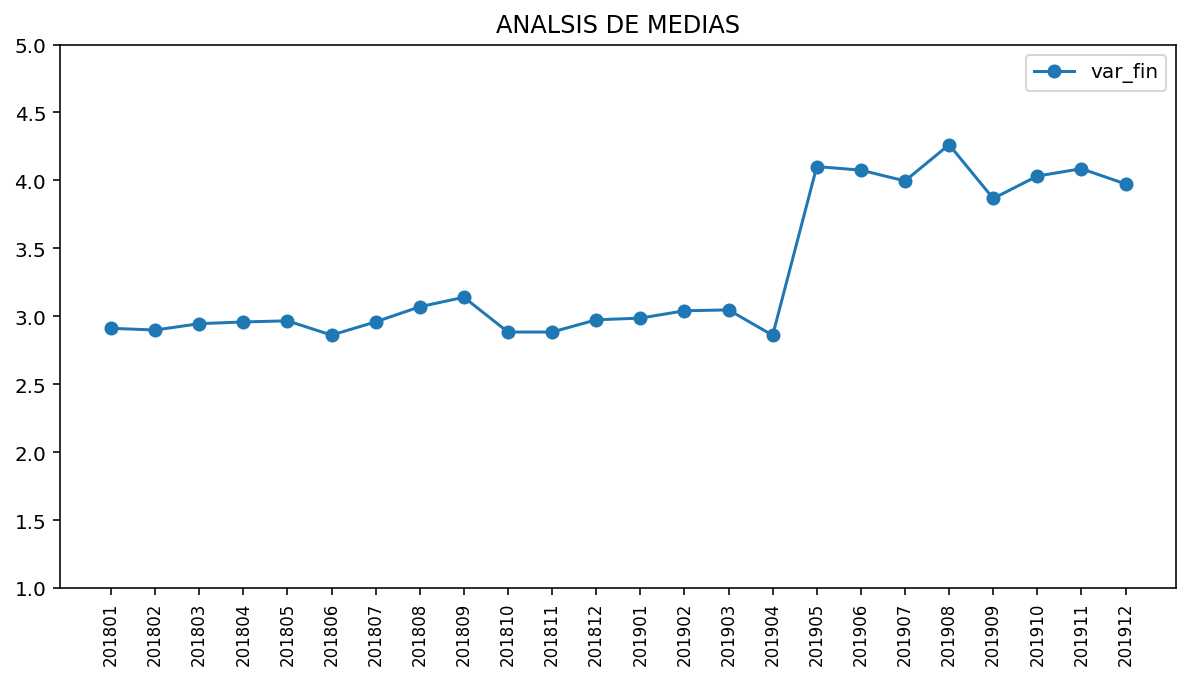

In [8]:
ax = summary.plot.line(y='var_fin', marker='o', rot=90, figsize=(10,5), title='ANALSIS DE MEDIAS', color='tab:blue')
plt.xticks(range(24), summary['date'], size='small')
ax.set_ylim([1,5]);

# Chow test

Prueba estadística para identificar cambio estructural en un set de datos mediante la verificación de igualdad entre los coeficientes de dos regresiones lineales.

El estadístico del Test de Chow es el siguiente:

$$Chow Test = \frac{( RSS_c - (RSS_1 + RSS_2)) \text{ / } k}{(RSS_1 + RSS_2) \text{ / } (N_1 + N_2 - 2k)}$$

donde:

- $RSS_c$ = Suma de cuadrados de los residuos usando todos los datos
- $RSS_1$ = Suma de cuadrados de los residuos usando la primera parte de los datos
- $RSS_2$ = Suma de cuadrados de los residuos usando la segunda parte de los datos
- $N_1$ = Número de observaciones de la primera parte de los datos
- $N_2$ = Número de observaciones de la segunda parte de los datos
- $k$ = Número de parámetros de la regresión

Supongamos que las dos regresiones a evaluar son:

- $y_i = \alpha_1 + \beta_1 x_{1i} + \epsilon$
- $y_i = \alpha_2 + \beta_2 x_{2i} + \epsilon$

Por lo que la hipótesis nula (HO) del test de Chow será que los coeficientes de las regresiones son iguales, es decir, $\alpha_1 = \alpha_2 \text{ y } \beta_1 = \beta_2$.

El estadístico del test se comporta como una **distribución F** con $k \text{ y } N_1 + N_2 - 2k$ grados de libertad.

### Regla de decisión

- Si `p_value` < 0.05 entonces rechazamos HO

<img src="../images/scatter_plot_1.png" width="480">
<img src="../images/scatter_plot_2.png" width="550">
<img src="../images/scatter_plot_3.png" width="500">

# Funciones para calcular el Chow Test

In [9]:
from sklearn.linear_model import LinearRegression
from scipy.stats import f

In [10]:
def get_residual_sum_of_squares(dataset, var_obj, var_interes):
    X = dataset[var_interes]
    y = dataset[var_obj]
    reg = LinearRegression().fit(X,y)
    residual = y - reg.predict(X)
    RSS = np.sum(residual**2)
    return RSS

In [11]:
def chow_test(dataset, seg1, seg2, var_obj, var_interes):
    rss  = get_residual_sum_of_squares(dataset, var_obj, var_interes)
    rss1 = get_residual_sum_of_squares(seg1, var_obj, var_interes)
    rss2 = get_residual_sum_of_squares(seg2, var_obj, var_interes)
    n1 = seg1.shape[0]
    n2 = seg2.shape[0]
    k = len(var_interes)+1
    ct = ((rss - rss1 - rss2) / k) / ((rss1 + rss2) / (n1 + n2 -2*k))
    p_value = 1-f.cdf(ct, k, n1 + n2 -2*k)
    return [ct,p_value]

La función entrega una lista con dos elementos:

- El valor del estadístico `ct`
- `p_value`

# Ejemplo 1

In [12]:
mat1 = {'x1': [1.2,1.6,3.5,4.0,5.6,5.7,6.7,7.5,8.5,9.7],
        'x2': [1.9,2.7,3.7,3.1,3.5,7.5,1.2,3.7,0.6,5.1],
        'y':  [0.9,1.3,2.0,1.8,2.2,3.5,1.9,2.7,2.1,3.6]}

mat2 = {'x1': [1.4,1.5,3.1,4.4,5.1,5.2,6.5,7.8,8.1,9.5],
        'x2': [1.3,2.3,3.2,3.6,3.1,7.3,1.5,3.2,0.1,5.6],
        'y':  [0.5,1.3,2.5,1.1,2.8,3.3,1.3,2.2,2.8,3.9]}

In [13]:
dat1 = pd.DataFrame(mat1)
dat2 = pd.DataFrame(mat2)

In [14]:
complete = pd.concat([dat1,dat2], ignore_index=True)

In [15]:
complete.head()

,x1,x2,y
0,1.2,1.9,0.9
1,1.6,2.7,1.3
2,3.5,3.7,2.0
3,4.0,3.1,1.8
4,5.6,3.5,2.2


In [16]:
chow_test(complete,dat1,dat2,'y',['x1','x2'])

[0.07154752544572586, 0.9742318542171963]

### Regla de decisión

Recordemos que si `p_value` < 0.05 entonces rechazamos HO (Son iguales los **coeficientes**) en favor de HA (son distintas las **Betas**).

### Resultado

Como `p_value` es igual a 0.974231..., entonces aceptamos la HO y concluimos que **NO HAY CAMBIO ESTRUCTURAL**

# Ejemplo 2

In [17]:
df = pd.read_csv('../data/chowtest_data.csv')

In [18]:
df.head()

,year,saving,income
0,1970,61.0,727.1
1,1971,68.6,790.2
2,1972,63.6,855.3
3,1973,89.6,965.0
4,1974,97.6,1054.2


In [19]:
df1 = df[df['year']<1982]
df2 = df[df['year']>=1982]

In [20]:
chow_test(df,df1,df2,'saving',['income'])

[10.690059062817632, 0.0005707572752082779]

### Regla de decisión

Recordemos que si `p_value` < 0.05 entonces rechazamos HO (Son iguales los **coeficientes**) en favor de HA (son distintas las **Betas**).

### Resultado

Como `p_value` es igual a 0.000570..., entonces rechazamos la HO y concluimos que **SI HAY CAMBIO ESTRUCTURAL**

Gracias!